# Nelinearni valovi

---

__Nelinearni valovi__ su rješenje valne jednadžbe oblika 

\begin{align*}
&u_t+c(u)\, u_x=0, \quad x\in\mathbb{R}, \quad t>0,\quad c'(u)>0 \\
&u(x,0)=\phi(x), \quad x\in \mathbb{R}, \tag{1}
\end{align*}

Karakteristične krivulje su definirane s

$$
\frac{dx(t)}{dt}=c(u). \tag{2}
$$

Zaista, uzduž svake krivulje koja zadovoljava (2), usmjerena derivacije je jednaka nuli  pa je rješenje konstantno:

$$
\frac{du(x(t),t)}{dt}=u_x\frac{dx(t)}{dt}+u_t\frac{dt}{dt}
=u_x\cdot c(u)+ u_t=0. \tag{3}
$$

Karakteristične krivulje su pravci: zbog (3) vrijedi

$$
\frac{d^2x(t)}{dt^2}=\frac{d}{dt} \bigg(\frac{dx(t)}{dt}\bigg)=
\frac{d}{dt}c(u(x(t),t))=c'(u)\frac{du(x(t),t)}{dt}=0
$$

pa je 

$$
x(t)=at+b.
$$

Nađimo rješenje: neka se točka $(x,t)\equiv(x(t),t)$ nalazi na karakteristici (pravcu) koji prolazi točkom $(\xi,0)$. Vrijednost rješenja je konstantna uzduž karakteristike pa je

$$
u(x,t)=\phi(\xi). \tag{4}
$$

Također, vrijedi

$$
\frac{dx(t)}{dt}=c(u(x,t))=c(u(\xi,0))=c(\phi(\xi))
$$

pa je

$$
x=x(t)=c(\phi(\xi))\,t+b.
$$

Uvrštavanje $x(0)=b=\xi$ daje

$$
x=x(t)=c(\phi(\xi))\,t+\xi.\tag{5}
$$

Ovo je implicitna definicija za $\xi$ koja, zajedno s (4), daje rješenje:

$$
u(x,t)=\phi(\xi),\quad x=c(\phi(\xi))\,t+\xi. \tag{6}
$$

Ukoliko se viša točka kreće brže od niže točke, dolazi do __opuštanja vala__ (eng. __release wave__), ili do __lomljenja vala__ (eng. __shock wave__).

__Primjer.__ Riješimo problem

\begin{align*}
&u_t+u\,u_x=0,\quad x\in\mathbb{R},\quad t>0,\\
&u(x,0)=\begin{cases} 2,\quad x<0, \\
2-x,\quad x\in[0,1], \\
1,\quad x>1. \end{cases}
\end{align*}

In [1]:
using Plots
#plotly()
gr()

Plots.GRBackend()

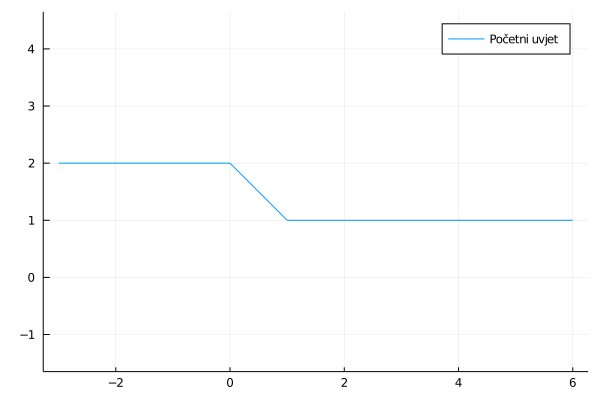

In [2]:
# Nacrtajmo početnu vrijednost
ϕ(x)=x<0 ? 2 : x>1 ? 1 : 2-x
plot(ϕ,-3,6,label="Početni uvjet",aspect_ratio=1)

Karakteristike su 

\begin{align*}
x(t)&=2t+\xi,\quad \xi<0,\\
x(t)&=(2-\xi)\,t+\xi,\quad \xi\in [0,1],\\
x(t)&=t+\xi,\quad \xi > 1.
\end{align*}

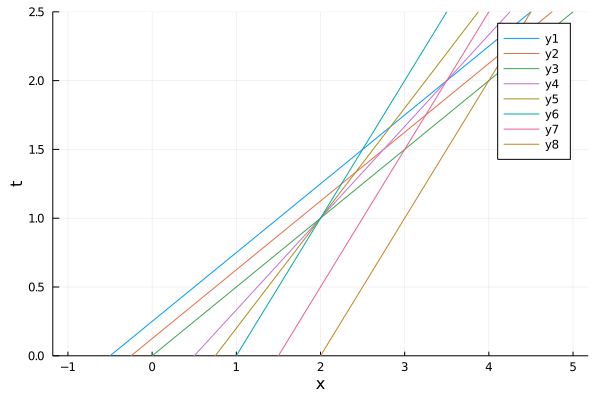

In [9]:
# Nacrtajmo karakteristike. Formule smo preradili tako da 
# je x nezavisna varijabla
t(x,ξ)=ξ<0 ? (x-ξ)/2 : ξ>1 ? x-ξ : (x-ξ)/(2-ξ)
t₁(x)=t(x,-0.5)
t₂(x)=t(x,-0.25)
t₃(x)=t(x,0)
t₄(x)=t(x,0.5)
t₅(x)=t(x,0.75)
t₆(x)=t(x,1)
t₇(x)=t(x,1.5)
t₈(x)=t(x,2)
plot(x->x,[t₁,t₂,t₃,t₄,t₅,t₆,t₇,t₈],-1,5,ylims=(0.0,2.5),
    xlabel="x",ylabel="t")

Vidimo da rješenje nakon $t=1$ __ne postoji__ (val se prelomi). Na primjer, točka 
$(x,t)=(4,2)$ se nalazi na dvije različite karakteristike i to $x=2t$ (za $\xi=0$) i 
$x=t+2$ (za $\xi=2$). Uzduž prve karakteristike sve točke imaju vrijednost $u=\phi(0)=2$, a uzduž druge karakteristike sve točke imaju vrijednost $u=\phi(2)=1$. Stoga bi vrijednost $u(4,2)$ trebala imati dvije različite vrijednosti, što je nemoguće.

U ovom primjeru rješenje možemo izračunati eksplicitno. Za $\xi<0$ vrijedi

$$
x-2t=\xi< 0 \Rightarrow x<2t, \quad u(x,t)=\phi(\xi)=2.
$$

Za $\xi>1$ vrijedi

$$
x-t=\xi>1 \Rightarrow x>1+t, \quad u(x,t)=\phi(\xi)=1.
$$

Za $\xi\in[0,1]$ je $2t\leq x\leq t+1$ i 

$$
u(x,t)=\phi(\xi)=\frac{2-x}{1-t}.
$$

Zaista, iz 

$$
x=(2-\xi)\,t+\xi=2t-\xi t +\xi
$$

slijedi 

$$
\phi(\xi)=2-\xi=2-\frac{x-2t}{1-t}=\frac{2-x}{1-t}.
$$

Rješenje je

$$
u(x,t)=\begin{cases} 2,\quad x<2t,\\
\displaystyle\frac{2-x}{1-t},\quad 2t\leq x\leq t+1,\\
1,\quad x>t+1.
\end{cases}
$$

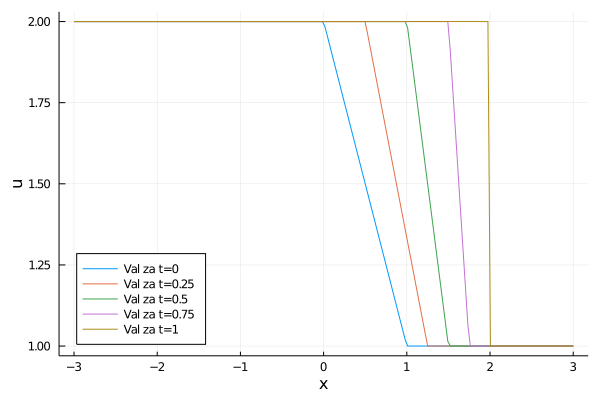

In [12]:
# Pogledajmo kako se val mijenja do trenutka t=1
u(x,t)=x<2*t ? 2 : x>t+1 ? 1 : (2-x)/(1-t)
u₁(x)=u(x,0)
u₂(x)=u(x,0.25)
u₃(x)=u(x,0.5)
u₄(x)=u(x,0.75)
u₅(x)=u(x,1.0)
plot(x->x,[u₁,u₂,u₃,u₄,u₅],-3,3,xlabel="x",ylabel="u",legend=:bottomleft,
    label=["Val za t=0" "Val za t=0.25" "Val za t=0.5" "Val za t=0.75" "Val za t=1"])

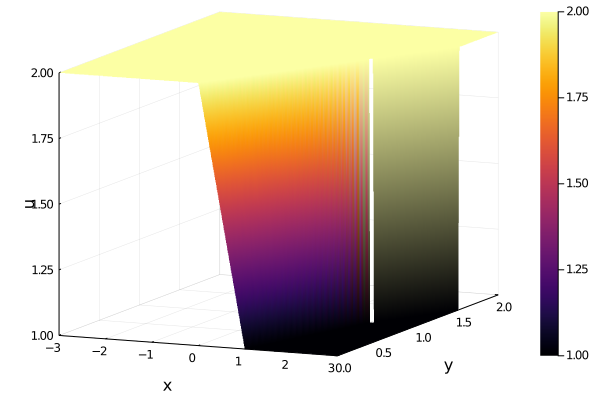

In [5]:
# Cijelo rješenje
X=range(-3,stop=3,length=121)
T=range(0,stop=2,length=121)
u(x,t)=x<2*t ? 2 : x>t+1 ? 1 : (2-x)/(1-t)
surface(X,T,u,xlabel="x",ylabel="y",zlabel="u")

## Vrijeme loma

Val će se prelomiti u trenutku kada $u_x$ postane beskonačno.
Izračunajmo __vrijeme loma__ (eng. __breaking time__) $t_b$.

Neka je u (1)

$$
c'(u)>0,\quad \phi(x)\geq 0,\quad \phi'(x)<0.
$$

Deiviranje jednakosti (5) po $x$ daje

$$
1=c'(\phi(\xi))\,\phi'(\xi)\, \xi_x\,t+\xi_x
$$

pa je

$$
\xi_x=\frac{1}{1+c'(\phi(\xi))\,\phi'(\xi)\,t}.
$$

Deriviranje jednakosti (4) po $x$ daje

$$
u_x=\phi'(\xi)\, \xi_x=\frac{\phi'(\xi)}{1+c'(\phi(\xi))\,\phi'(\xi)\,t}
$$

pa je vrijeme loma najmanje vrijeme $t$ za koje je nazivnik jednak nuli,

$$
t_b=\min_\xi \frac{-1}{c'(\phi(\xi))\,\phi'(\xi)}.
$$



Na primjer, u prethodnom primjeru je

$$
c(u)=u, \quad c'(u)=1,\quad \phi(x)=2-x, \quad \phi'(\xi)=-1
$$

pa je vrijeme loma jednako

$$
t_b=\frac{-1}{1\cdot(-1)}=1.
$$

__Primjer.__ Prema (6), rješenje problema

\begin{align*}
&u_t+u^2\,u_x=0,\quad x\in\mathbb{R},\quad t>0,\\
&u(x,0)=\sin x+2,
\end{align*}

dano je implicitnim formulama

$$
u(x,t)=\sin\xi +2,\quad x=(\sin\xi +2)^2\, t+\xi.
$$

U ovom slučaju ne možemo dobiti eksplicitno rješenje. Međutim, u zadanom trenutku $t$ možemo lako nacrtati val. Također, za zadanu točku $(x,t)$ možemo izračunati pripadni $\xi$ nekom od numeričkih metoda za rješavanje nelinearnih jednadžbi, ali u tom slučaju moramo unaprijed znati približnu vrijednost rješenja $\xi$.

Izračunajmo vrijeme loma: ovdje je

$$
c'(u)=2u>0,\quad \phi(x)=\sin x+2>0, \quad \phi'(x)=\cos x<0,\
x\in\big[\frac{1}{2}\pi,\frac{3}{2}\pi\big].
$$

Funkcija 

$$
t_b=\frac{-1}{2(\sin \xi +2)\cos \xi}
$$

poprima minimum za (izračunajte!)

$$
\sin\xi=-\frac{1}{2}+\frac{\sqrt{3}}{2}
$$

pa je vrijeme loma

$$
t_b=\frac{\sqrt{2}}{(3+\sqrt{3})\sqrt{\sqrt{3}}}\approx0.227.
$$

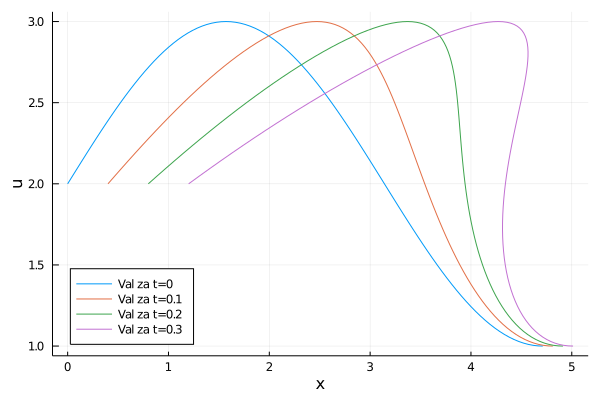

In [6]:
# Pogledajmo kako se val mijenja u ovisnosti o vremenu t 
ξ=range(0,stop=3*pi/2,length=100)
U=sin.(ξ).+2
T₀=0
X₀=U.^2*T₀+ξ
T₁=0.1
X₁=U.^2*T₁+ξ
T₂=0.2
X₂=U.^2*T₂+ξ
T₃=0.3
X₃=U.^2*T₃+ξ
plot(X₀,U,label="Val za t=$T₀")
plot!(X₁,U,label="Val za t=$T₁")
plot!(X₂,U,label="Val za t=$T₂")
plot!(X₃,U,xlabel="x",ylabel="u",label="Val za t=$T₃",legend=:bottomleft)

__Primjer.__ Rješenje problema

\begin{align*}
&u_t+u\,u_x=0,\quad x\in\mathbb{R},\quad t>0,\\
&u(x,0)=e^{-x^2},
\end{align*}

je dano implicitnim formulama

$$
u(x,t)=e^{-\xi^2},\quad x=e^{-\xi^2}\, t+\xi.
$$

U ovom slučaju ne možemo dobiti eksplicitno rješenje. 
Izračunajmo vrijeme loma: ovdje je

$$
c'(u)=1>0,\quad \phi(x)=e^{-x^2}>0, \quad \phi'(x)=-2x\, e^{-x^2}<0,\
x>0.
$$

Funkcija 

$$
t_b=\frac{-1}{-2\xi\, e^{-\xi^2}}=\frac{e^{\xi^2}}{2\xi}
$$

poprima minimum za $\xi=\sqrt{\displaystyle\frac{1}{2}}$ pa je vrijeme loma
$t_b=\sqrt{\displaystyle\frac{e}{2}}\approx 1.166$.

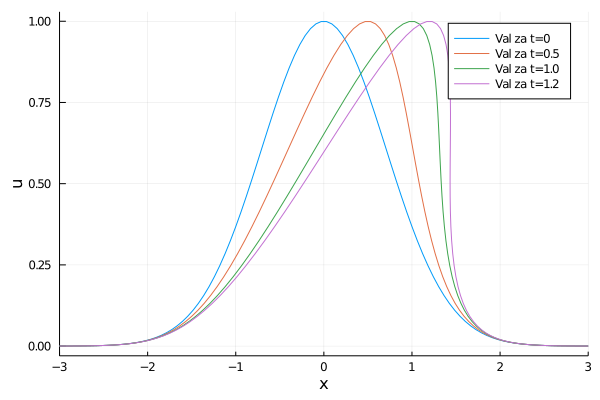

In [7]:
# Pogledajmo kako se val mijenja u ovisnosti o vremenu t 
ξ=range(-3,stop=3,length=100)
U=exp.(-ξ.^2)
T₀=0
X₀=U*T₀+ξ
T₁=0.5
X₁=U*T₁+ξ
T₂=1.0
X₂=U*T₂+ξ
T₃=1.2
X₃=U*T₃+ξ
plot(X₀,U,xlims=(-3.0,3.0),label="Val za t=$T₀")
plot!(X₁,U,label="Val za t=$T₁")
plot!(X₂,U,label="Val za t=$T₂")
plot!(X₃,U,xlabel="x",ylabel="u",label="Val za t=$T₃")

## Burgerova jednadžba

__Burgerova jednadžba__ je zbroj valne jednadžbe (advekcija u linearnom slučaju) i toplinske jednadžbe (difuzija). Primjer linearne Burgerove jednadžbe je 

$$
u_t+cu_x-\nu u_{xx}=0.
$$

Ako početni uvjet ima oblik

$$
u(x,0)=Ae^{ikx},
$$

onda tražmo rješenje oblika $u(x,t)=f(t)e^{ikx}$. Uvrštavanje u jednadžbu daje

$$
e^{ikx}\big[f'(t)+cf(t)ik+\nu f(t)k^2\big]=0.
$$

Izjednačavanje izraza u zagradi s nulom daje populacijsku jednadžbu

$$
f'(t)=f(t)(-cik-\nu k^2)
$$

pa je, uz korištenje početnog uvjeta,

$$
f(t)=Ae^{(-cik-\nu k^2)\,t}.
$$

Rješenje jednadžbe je 

$$
u(x,t)=Ae^{-\nu k^2 t}e^{ik(x-ct)},
$$

odnosno njen realni ili imaginarni dio, na primjer

$$
u(x,t)=Ae^{-\nu k^2 t}\cos k(x-ct).
$$

Radi se o gušenom desnom valu s valnim brojem $k$ i brzinom $c$, s time što valovi s manjim valnim duljinama opadaju brže.

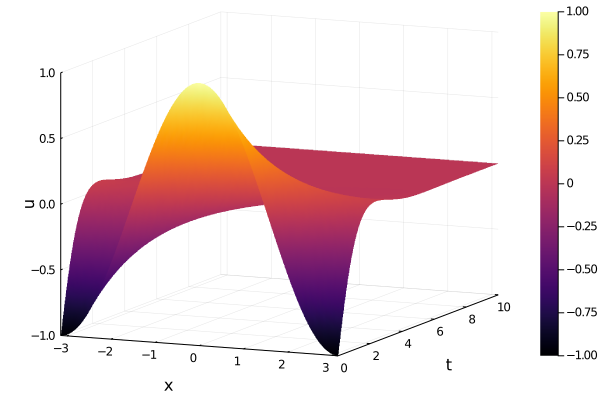

In [8]:
# Nacrtajmo rješenje
c=1
ν=1
A=1
k=1
X=range(-pi,stop=pi,length=101)
T=range(0,stop=10,length=121)
u(x,t)=A*exp(-ν*k^2*t)*cos(k*(x-c*t))
surface(X,T,u,xlabel="x",ylabel="t",zlabel="u")